Dataset Description:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins(W).

Input features are Runs(R),At Bats(AB),Hits(H),Doubles(2B),Triples(3B),Homeruns(H),Walks(BB),Strikeouts(SO),Stolen Bases(SB),Runs Allowed(RA),Earned Runs(ER),Earned Run Average(ERA),CG,Shutouts(SHO),Saves(SV),and Errors(E).
Output is the Number of predicted wins (W).

In [366]:
#Importing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [367]:
#Loading the dataset
df=pd.read_csv('Baseball_case_study.csv')

In [368]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [369]:
df.shape

(30, 17)

There are 30 rows and 17 columns in the dataframe.

In [370]:
#Checking the datatypes
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [371]:
#Checking null values in the dataframe
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null values are present

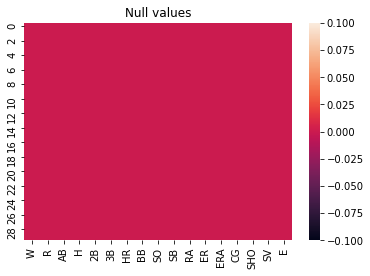

In [372]:
#Checking for null values through heatmap
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

There are no null values present,if there will be any null value in the dataset then we will see some white short lines in the heatmap which shows the presence of null values.

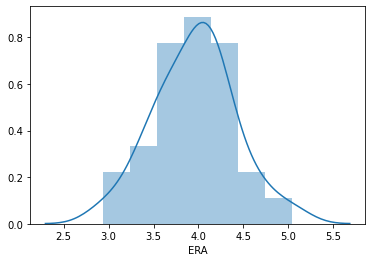

In [373]:
#Checking the distribution of the continuous value of the float type columns
sns.distplot(df['ERA'],kde=True)

In [374]:
#Describe the dataset
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Statistical summary of the dataset

In [375]:
#Correlation of the columns with the target column
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


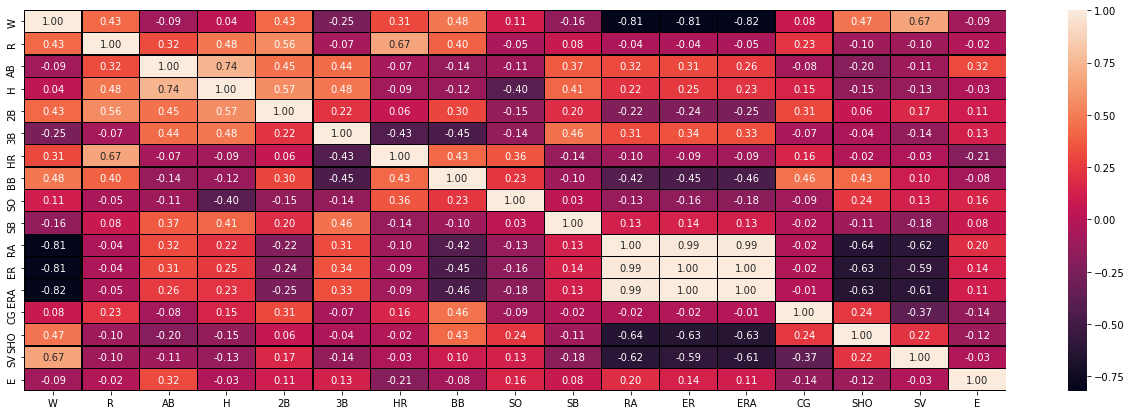

In [376]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Checking the columns which are positively and negatively correlated with the target column.

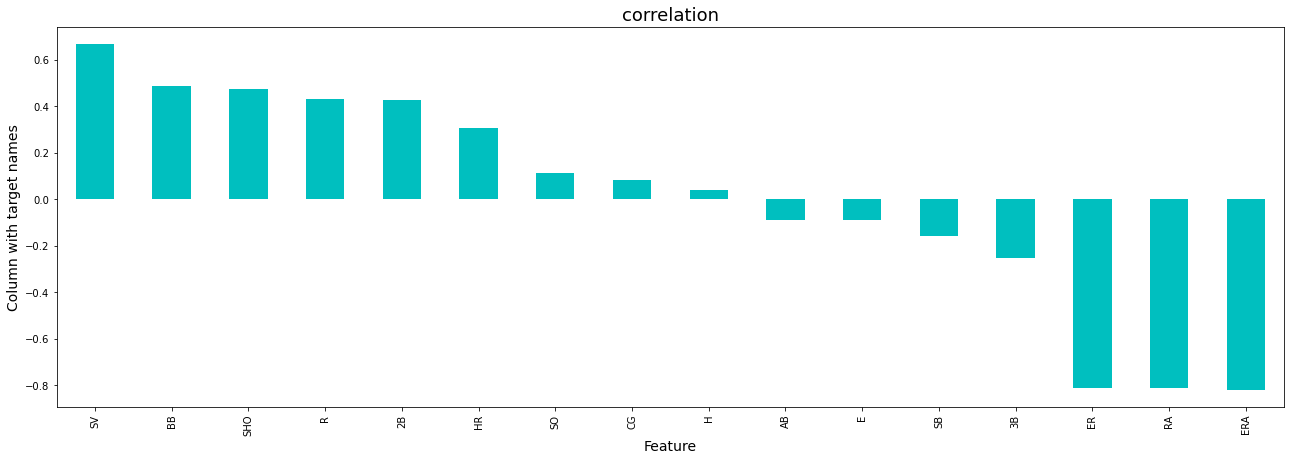

In [377]:
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [378]:
corr_matrix=df.corr()
corr_matrix['W'].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

Now,we clearly identify the correlation of independent variables with target variable'W'.There are around 7 variables who has less than 0.01 correlation value(very weak relationship).

In [379]:
#Checking the pairplot
#sns.pairplot(df)

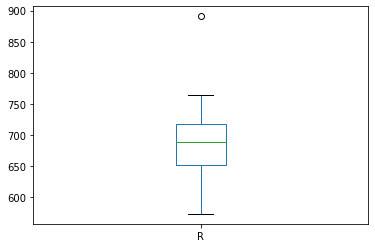

In [380]:
#Checking the outliers using boxplots
df['R'].plot.box()


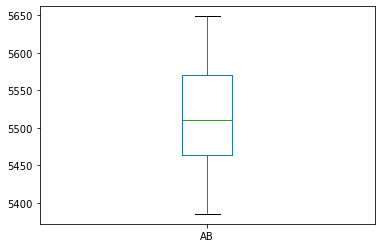

In [381]:
df['AB'].plot.box()

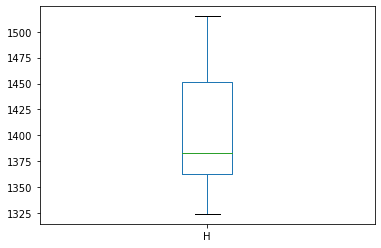

In [382]:
df['H'].plot.box()

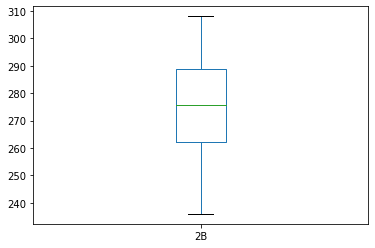

In [383]:
df['2B'].plot.box()

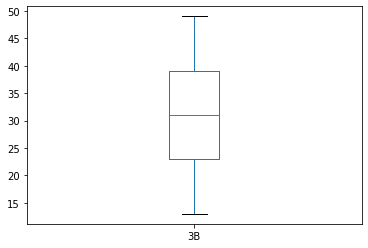

In [384]:
df['3B'].plot.box()

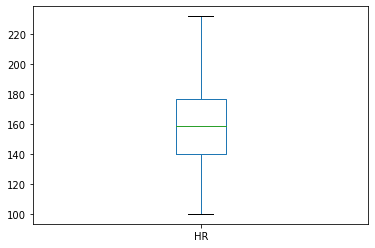

In [385]:
df['HR'].plot.box()

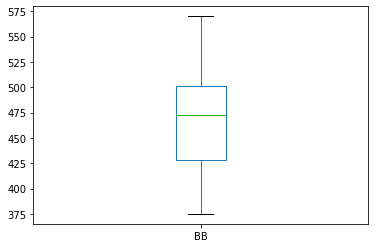

In [386]:
df['BB'].plot.box()

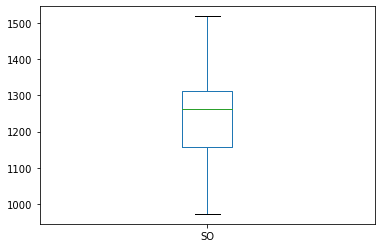

In [387]:
df['SO'].plot.box()

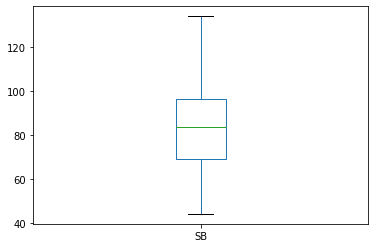

In [388]:
df['SB'].plot.box()

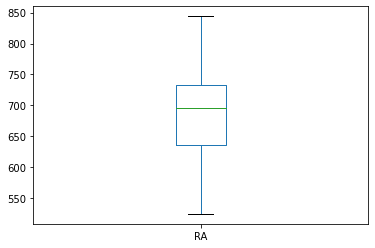

In [389]:
df['RA'].plot.box()

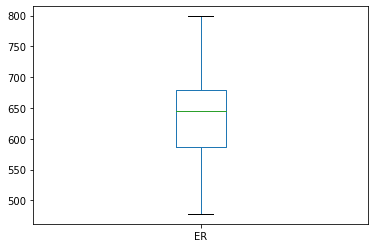

In [390]:
df['ER'].plot.box()

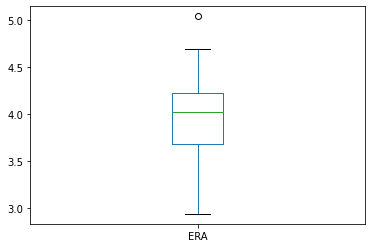

In [391]:
df['ERA'].plot.box()

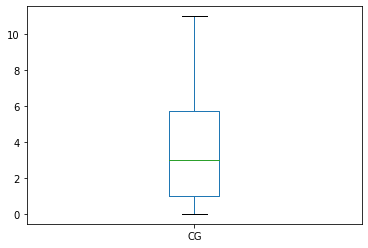

In [392]:
df['CG'].plot.box()

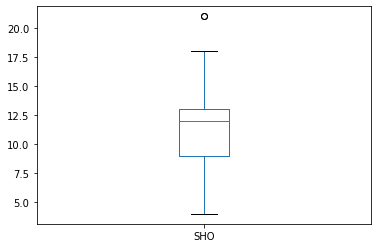

In [393]:
df['SHO'].plot.box()

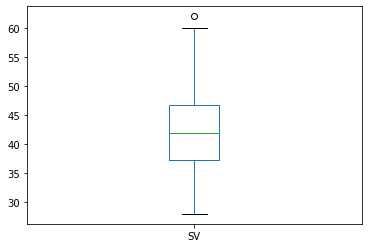

In [394]:
df['SV'].plot.box()

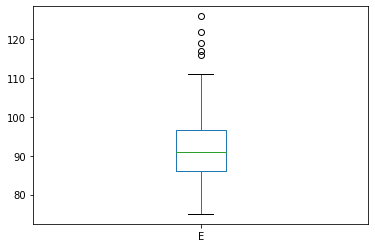

In [395]:
df['E'].plot.box()

In [396]:
#Removing outliers using Zscore
z=np.abs(zscore(df))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [397]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [398]:
z[5][1]

3.5096470447193067

In [399]:
print('shape before removing the outliers:',df.shape)
dfnew=df[(z<3).all(axis=1)]
print('shape after removing the outliers:',dfnew.shape)

shape before removing the outliers: (30, 17)
shape after removing the outliers: (29, 17)


In [400]:
#%data loss calculation
loss_percent=(30-29)/30*100
print(loss_percent)

3.3333333333333335


3% data is lost after outliers removal which is acceptable.

In [401]:
df=dfnew
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [402]:
#Checking skewness in the data
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [403]:
#Removing skewness using 'log1p'
skew=('H','CG','SV','E')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
    

In [404]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
E      0.586101
dtype: float64

The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero

Note: Making the skewness value near to zero will help to get better score.

In [405]:
#Removing skewness from columns 'H','CG','SV','E'using PowerTransformer
#from sklearn.preprocessing import PowerTransformer
#df_new=PowerTransformer(method='yeo-johnson')
#df_new1=df_new.fit_transform(df.iloc[:,3:4])
#df_new1.shape

In [406]:
#df_new2=df_new.fit_transform(df.iloc[:,13:14])

In [407]:
#df_new3=df_new.fit_transform(df.iloc[:,15:17])

In [408]:
#df_N=pd.DataFrame(df_new1)
#df_N.rename(columns={0:"H"}, errors="raise",inplace=True)
#df_N

In [409]:
#df_N.skew()

In [410]:
#df_N1=pd.DataFrame(df_new2)
#df_N1.rename(columns={0:"CG"},errors="raise",inplace=True)
#df_N1

In [411]:
#df_N1.skew()

In [412]:
#df_N2=pd.DataFrame(df_new3)
#df_N2.rename(columns={0:"SV",1:"E"}, errors="raise",inplace=True)
#df_N2

In [413]:
#df_N2.skew()

In [414]:
#df.drop(['H','CG','SV','E'],axis=1,inplace=True)

In [415]:
#df.head()

In [416]:
#df_updated=pd.concat([df,df_N,df_N1,df_N2],axis=1)

In [417]:
#df_updated

In [418]:
#df_updated.dtypes

In [419]:
#df_updated.isnull().sum()

In [420]:
#Removing null values from df_updated using mean
#df_updated["W"]=df_updated["W"].fillna(np.mean(df_updated["W"]))

In [421]:
#df_updated["R"]=df_updated["R"].fillna(np.mean(df_updated["R"]))

In [422]:
#df_updated["AB"]=df_updated["AB"].fillna(np.mean(df_updated["AB"]))

In [423]:
#df_updated["2B"]=df_updated["2B"].fillna(np.mean(df_updated["2B"]))

In [424]:
#df_updated["3B"]=df_updated["3B"].fillna(np.mean(df_updated["3B"]))

In [425]:
#df_updated["HR"]=df_updated["HR"].fillna(np.mean(df_updated["HR"]))

In [426]:
#df_updated["BB"]=df_updated["BB"].fillna(np.mean(df_updated["BB"]))

In [427]:
#df_updated["SO"]=df_updated["SO"].fillna(np.mean(df_updated["SO"]))

In [428]:
#df_updated["SB"]=df_updated["SB"].fillna(np.mean(df_updated["SB"]))

In [429]:
#df_updated["RA"]=df_updated["RA"].fillna(np.mean(df_updated["RA"]))

In [430]:
#df_updated["ER"]=df_updated["ER"].fillna(np.mean(df_updated["ER"]))

In [431]:
#df_updated["ERA"]=df_updated["ERA"].fillna(np.mean(df_updated["ERA"]))

In [432]:
#df_updated["SHO"]=df_updated["SHO"].fillna(np.mean(df_updated["SHO"]))

In [433]:
#df_updated["H"]=df_updated["H"].fillna(np.mean(df_updated["H"]))

In [434]:
#df_updated["CG"]=df_updated["CG"].fillna(np.mean(df_updated["CG"]))

In [435]:
#df_updated["SV"]=df_updated["SV"].fillna(np.mean(df_updated["SV"]))

In [436]:
#df_updated["E"]=df_updated["E"].fillna(np.mean(df_updated["E"]))

In [437]:
#df_updated.isnull().sum()

In [438]:
#df_updated

In [439]:
#convert_dict={'W':int}

In [440]:
#df_updated=df_updated.astype(convert_dict)
#print(df_updated.dtypes)

In [441]:
#df_updated['W']

In [442]:
#df_updated

Skewness is removed and we have concated two dataframes in a single dataframe (df_updated).

Our new updated dataframe is df_updated.

In [443]:
#Separating the independent and target variable in x and y
#x=df_updated.drop('W',axis=1)
#y=df_updated['W']

In [444]:
#Separating the independent and target variable in x and y
x=df.drop('W',axis=1)
y=df['W']

In [445]:
#Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [446]:
#Using multiple Algorithms for calculating the best algo which suits best for our data set
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
model=[DecisionTreeClassifier(),KNeighborsClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier()]
max_accuracy_score=0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre=i.predict(test_x)
        acc_sc=accuracy_score(test_y,pre)
        print('accuracy score correspond to random state',r_state,'is',acc_sc)
        if acc_sc>max_accuracy_score:
            max_accuracy_score=acc_sc
            final_state=r_state
            final_model=i
print()
print()
print()
print()
print('max accuracy score correspond to random state',final_state,'is',max_accuracy_score,'and model is',final_model)

accuracy score correspond to random state 40 is 0.0
accuracy score correspond to random state 40 is 0.0
accuracy score correspond to random state 40 is 0.0
accuracy score correspond to random state 40 is 0.0
accuracy score correspond to random state 40 is 0.0
accuracy score correspond to random state 41 is 0.0
accuracy score correspond to random state 41 is 0.0
accuracy score correspond to random state 41 is 0.0
accuracy score correspond to random state 41 is 0.0
accuracy score correspond to random state 41 is 0.0
accuracy score correspond to random state 42 is 0.0
accuracy score correspond to random state 42 is 0.0
accuracy score correspond to random state 42 is 0.0
accuracy score correspond to random state 42 is 0.0
accuracy score correspond to random state 42 is 0.0
accuracy score correspond to random state 43 is 0.0
accuracy score correspond to random state 43 is 0.1
accuracy score correspond to random state 43 is 0.0
accuracy score correspond to random state 43 is 0.0
accuracy sco

Above I am using for loop which helps me to provide the accuracy score at each random state and for the best state where accuracy score is maximum has come as output value.

In [457]:
#Checking the best parameter for prediction of AdaBoostClassifier Algo using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=68,test_size=0.33)
ada=AdaBoostClassifier()
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)
search.fit(x,y)
search.best_params_

{'learning_rate': 0.001, 'n_estimators': 500}

In [458]:
ada=AdaBoostClassifier(n_estimators=500)
ada.fit(train_x,train_y)
pred=ada.predict(test_x)
acc_sc=accuracy_score(test_y,pred)
print('accuracy score:',acc_sc*100)
kf = KFold(n_splits=5)
adascore=cross_val_score(ada,x,y,cv=kf)
adasc=adascore.mean()
print('Cross Val Score:',adasc*100)

accuracy score: 10.0
Cross Val Score: 3.3333333333333335


Text(0, 0.5, 'Predicted_Y')

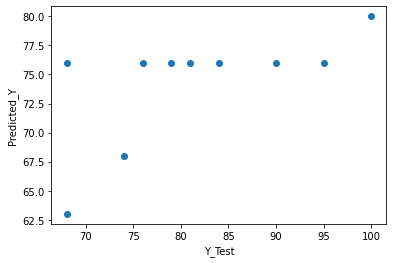

In [459]:
#Checking the difference between actual and predicted value using graph
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

In [460]:
import pickle
filename='baseball.pkl'
pickle.dump(dtc,open(filename,'wb'))